<a href="https://colab.research.google.com/github/moumi-18/Practise_codes/blob/master/Medical_Insurance_Cost_prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries/ Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [ ]:
# Loading the data from csv to pandas datagframe
insurance_data = pd.read_csv('/content/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Lets check categorical values
print(insurance_data.sex.value_counts())
print(insurance_data.smoker.value_counts())
print(insurance_data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# Statistical Measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


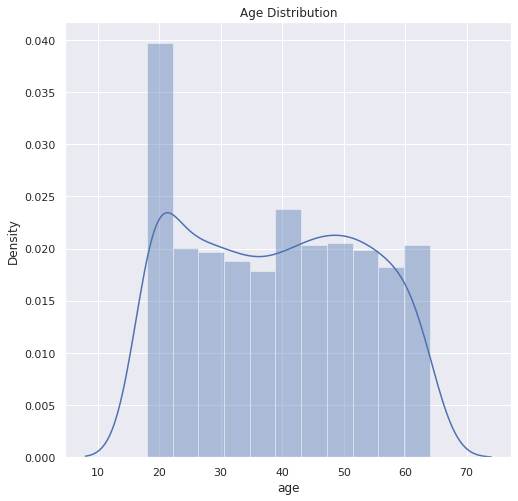

In [ ]:
# Distribution of dataset-
# For Age:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

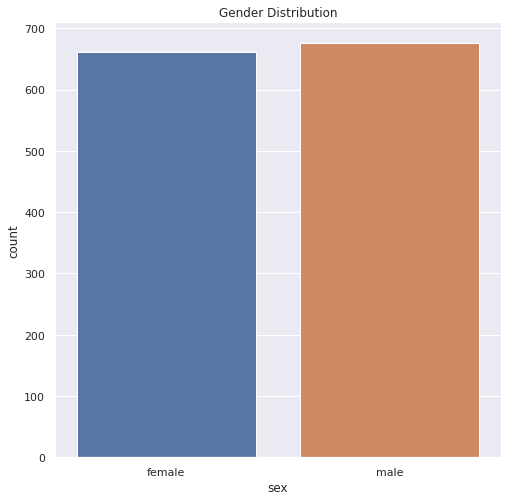

In [ ]:
# For Gender:
plt.figure(figsize=(8,8))
sns.countplot(x='sex', data = insurance_data)
plt.title('Gender Distribution')
plt.show()

In [ ]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


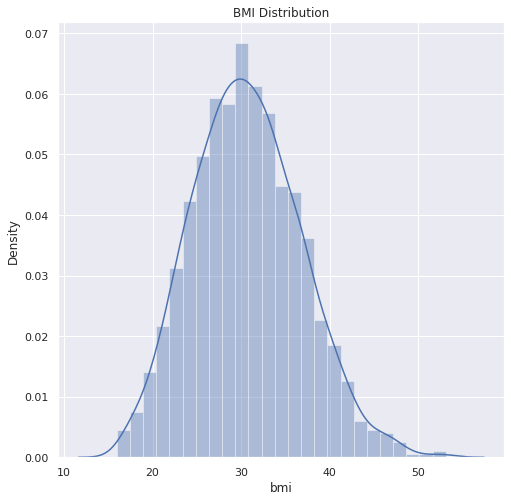

In [ ]:
# For BMI Distribution
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range - 18.5 to 24.9
The dataset is showing that there are more people with higher BMI index and this will impact the insurance cost.

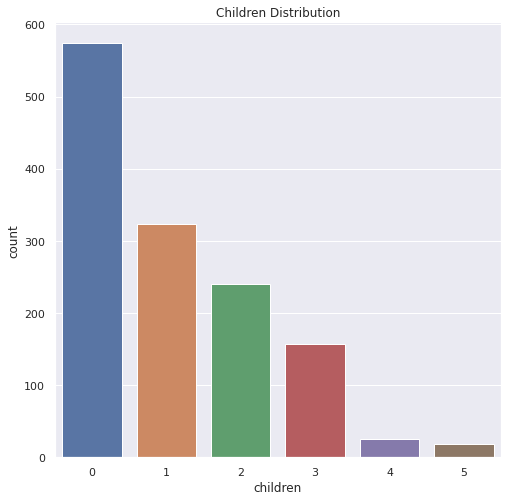

In [ ]:
# For Children Distribution
plt.figure(figsize=(8,8))
sns.countplot(x= 'children', data = insurance_data)
plt.title('Children Distribution')
plt.show()

In [ ]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

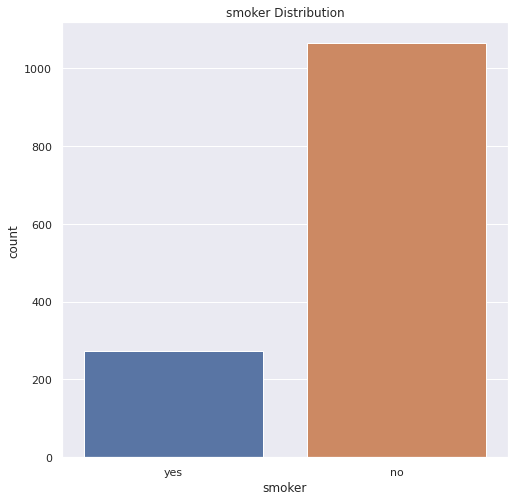

In [ ]:
# For smoker Distribution
plt.figure(figsize=(8,8))
sns.countplot(x= 'smoker', data = insurance_data)
plt.title('smoker Distribution')
plt.show()

In [ ]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

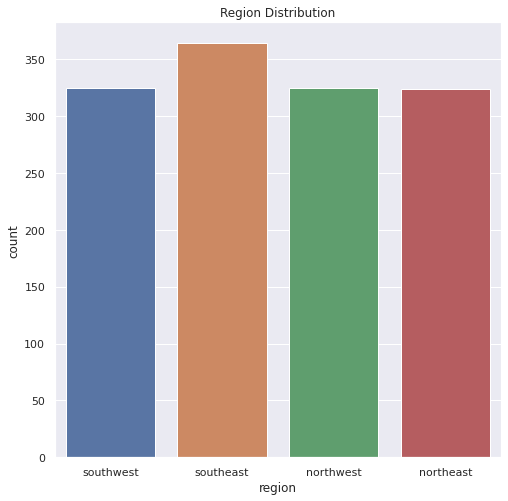

In [ ]:
# For region Distribution
plt.figure(figsize=(8,8))
sns.countplot(x= 'region', data = insurance_data)
plt.title('Region Distribution')
plt.show()

In [ ]:
insurance_data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


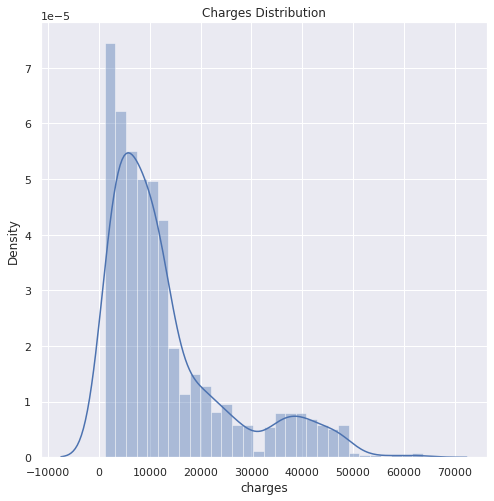

In [ ]:
# For charges Distribution
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

In [ ]:
# encoding ctegorical features
# For sex -
insurance_data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# For smoker - 
insurance_data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# For region -
insurance_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [ ]:
# Splitting features and target
X = insurance_data.drop(['charges'], axis=1)
Y = insurance_data['charges']

In [ ]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
# Splitting the data into Train data and Test data - arrays
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


Model Training

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [ ]:
train_data_prediction = lin_reg.predict(X_train)

In [ ]:
error_r2 = metrics.r2_score(Y_train, train_data_prediction)
print('R2 value:', error_r2)

error_mae = metrics.mean_absolute_error(Y_train, train_data_prediction)
print('MAE value:', error_mae)

R2 value: 0.751505643411174
MAE value: 4150.500304883775


In [ ]:
# For test data
test_data_prediction = lin_reg.predict(X_test)

In [ ]:
error_r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score for Test Data:', error_r2_test)

R2 score for Test Data: 0.7447273869684077


Building a Predictive System

In [ ]:
input_data = (31,1,25.74,0,1,0)

#changing input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = lin_reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD:', prediction[0])

[3760.0805765]
The insurance cost is USD: 3760.0805764960587
